In [1]:

import pandas as pd
import numpy as np
from collections import Counter
import os.path as osp
import os
import json
import matplotlib.pyplot as plt
import pickle
import torch

# Print all variables on their own lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 100)


In [2]:
""" Load csv's"""

# user_to_result = {}

# for user_id in train_users:
#     user_csv_path = os.path.join(SGD_path,f"user_{user_id}","metrics.csv")
#     user_df = pd.read_csv(user_csv_path)
#     user_to_result[user_id] = dump_dict

#     # user_df.head()
#     # user_df.columns.tolist()

#     # Use step, remove NaNs
#     user_df[['step',metric_key]].head()

#     user_df = user_df[['step',metric_key]] # Subset columns
#     user_df = user_df[user_df[metric_key].notna()] # Rremove nans
#     # user_df.head()

#     y_vals = [0] + user_df[metric_key].tolist()
#     x_vals = list(range(len(y_vals)))

" Load csv's"

" Plot average histogram over user's actions/verbs/nouns."

Saved plot: ../imgs/SGD_users/2022-10-20_22-55-29_LABEL_HISTOGRAM_TRAIN/LABEL_HISTOGRAM_TRAIN_iterations.pdf


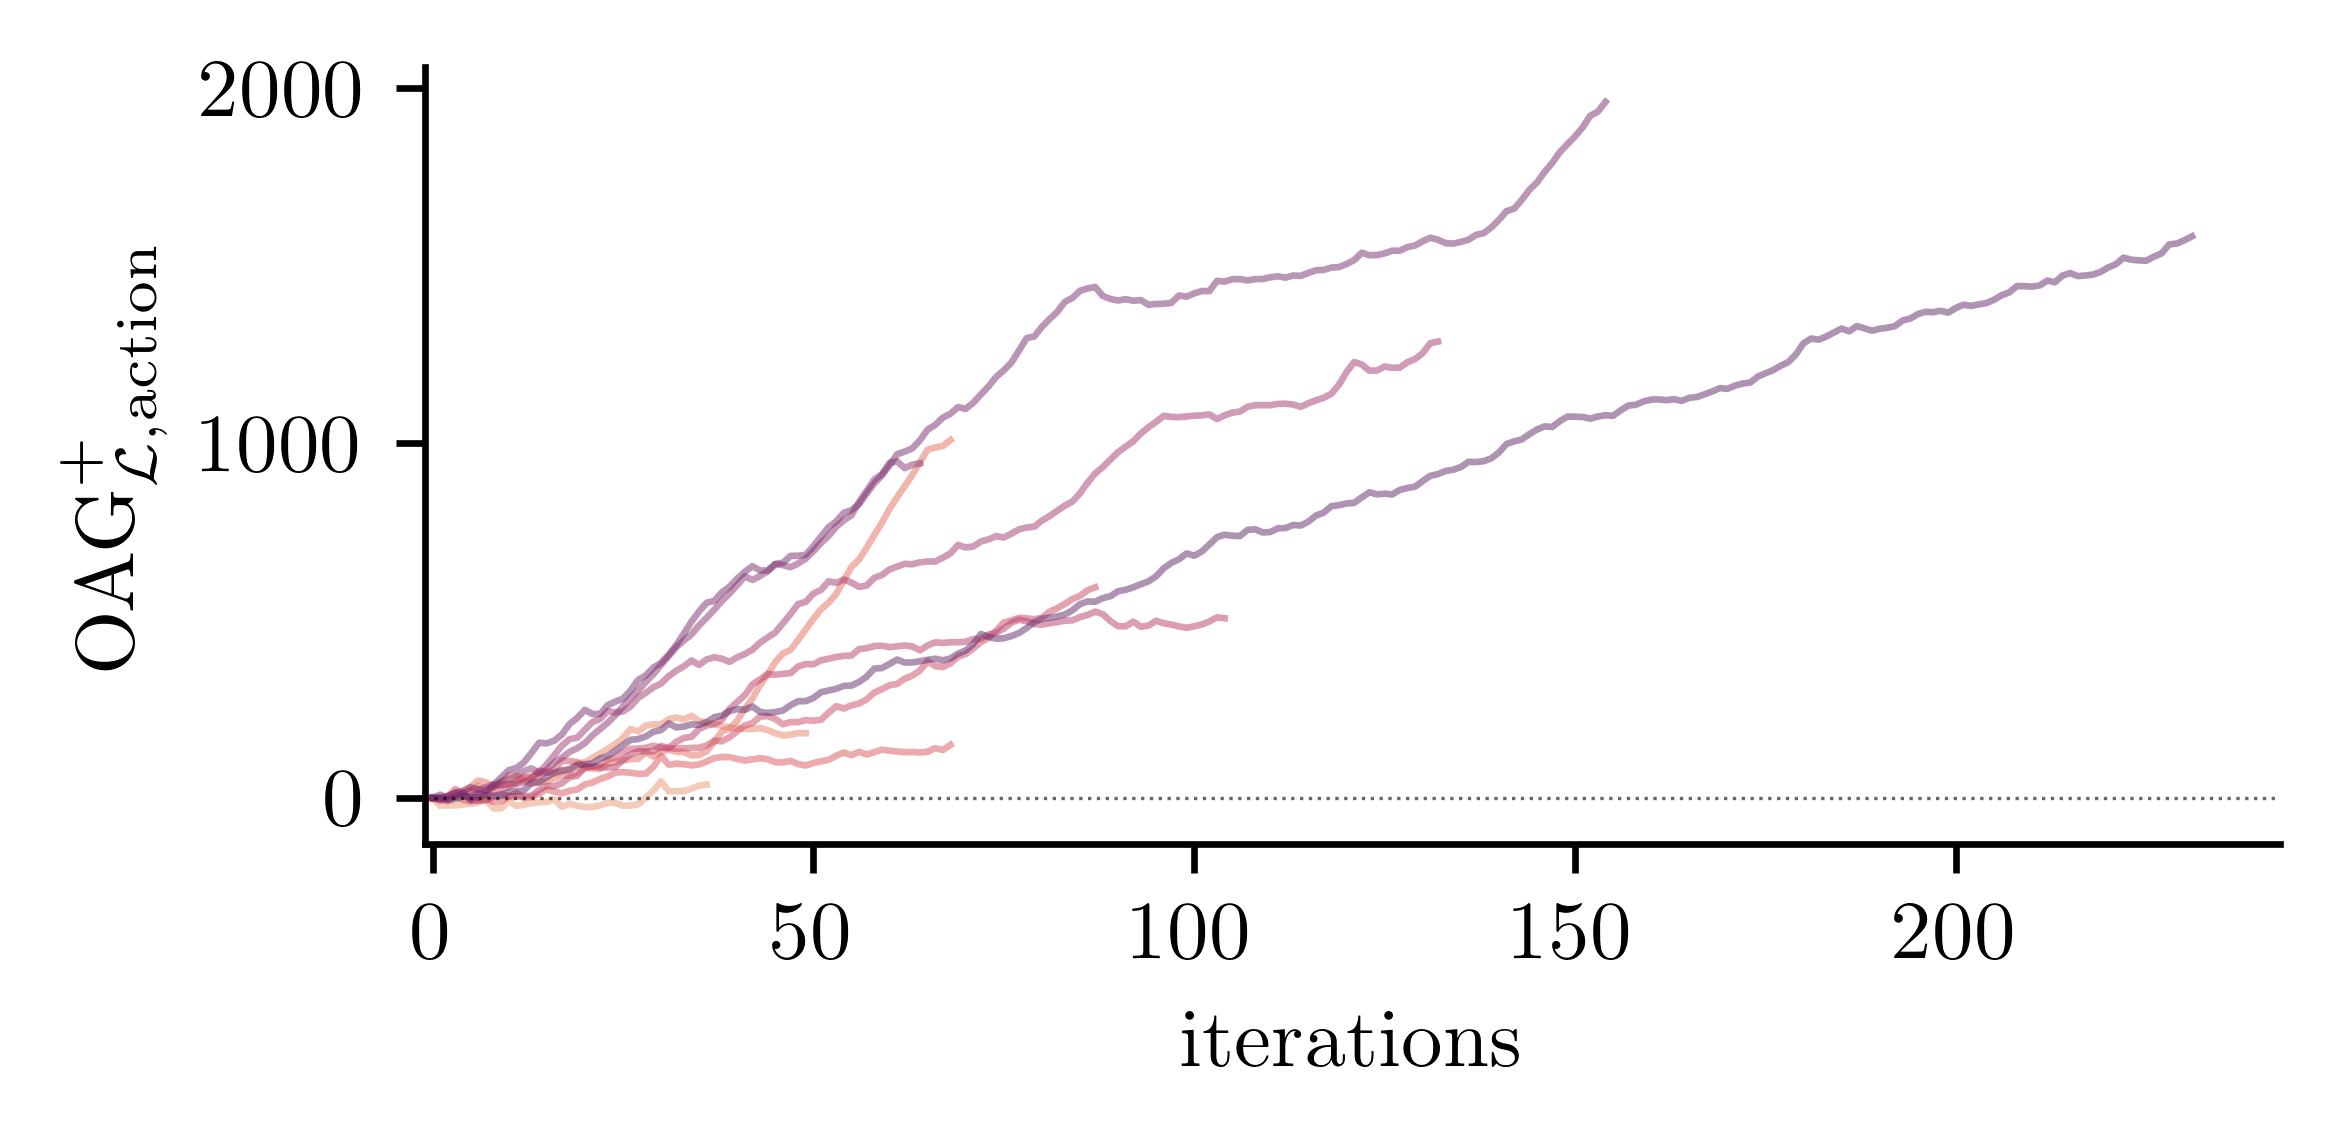

<Figure size 432x288 with 0 Axes>

In [3]:
import seaborn as sns
import datetime
import os

# RESULTS CONFIG
SGD_path = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/final01_01_finetuning_sgd/logs/GRID_SOLVER-BASE_LR=0-01_SOLVER-MOMENTUM=0-0_SOLVER-NESTEROV=True/2022-09-13_10-53-52_UID958392f7-c477-4a09-a7ac-c72cc81251c2/user_logs"
train_users = ['68', '265', '324', '30', '24', '421', '104', '108', '27', '29']
metric_key='train_action_batch/AG_cumul'
TRAIN_USERS_MODE = True
ZOOM = False

# SAVE CONFIG
main_outdir = "../imgs/SGD_users"
title = f"LABEL_HISTOGRAM_{'TRAIN' if TRAIN_USERS_MODE else 'TEST'}"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)
os.makedirs(parent_dirpath, exist_ok=True)

# MPL CONFIG
# Use latex in mpl
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 6 # Instead of 10
# plt.rcParams.update(**font)


# # Set latex font in mpl
# plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

if ZOOM:
    xlim=(-1,50)
    ylim=(None,500)
else:
    xlim=(-1,None)
    ylim=(None,None)

figsize = (4,2)

ylabel = r"$\text{OAG}_{\mathcal{L}, \text{action}}^+$"
xlabel = "iterations"

# LINE CONFIG
line_colors = sns.color_palette("flare", 10) 
# line_colors =sns.color_palette("Paired",10)
# line_colors =sns.color_palette("Spectral", 10)

cumul=True
linewidth = 0.8

if TRAIN_USERS_MODE:
    line_alpha=0.5
else:
    line_alpha=0.2


# BARCHART CONFIG
plot_yerror = None 
bar_color = 'black' #my_cmap.colors if bar_colors is None else bar_colors[plot_idx]
legend_label = None
bar_align='center'
log=False
legend_labels=None
grid = False
bar_alpha = 0.1
bar_marker_offset=0
bar_width=0.4

class PlotEntry:
    def __init__():
        self.x_vals = None
        self.y_vals = None
        self.label_name = None

""" Plot average histogram over user's actions/verbs/nouns."""
def plot_user_histogram_lines_and_avg_bars():
    """"""
    nb_users = len(train_users)
    fig, ax = plt.subplots(figsize=figsize, dpi=600)
    
    
    user_to_result = {}
    for user_idx, user_id in enumerate(train_users):
        user_csv_path = os.path.join(SGD_path,f"user_{user_id}","metrics.csv")
        user_df = pd.read_csv(user_csv_path)
        user_to_result[user_id] = user_df

        # user_df.head()
        # user_df.columns.tolist()

        # Use step, remove NaNs
        user_df[['step',metric_key]].head()

        user_df = user_df[['step',metric_key]] # Subset columns
        user_df = user_df[user_df[metric_key].notna()] # Rremove nans
        # user_df.head()

        y_vals = [0] + user_df[metric_key].tolist()
        x_vals = list(range(len(y_vals)))
        
        
        # PLOT
        color = line_colors[user_idx % len(line_colors)]
        plt.plot(x_vals,y_vals,alpha=line_alpha,color=color,linewidth=linewidth,
#                  marker='|',markersize=2
                )
        
    plt.axhline(y=0, color='black', linestyle=':',alpha=0.6,linewidth=0.4)
    
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

#     if x_labels:
#         plt.xticks(x_axis, x_labels, rotation='vertical')
#     if y_labels:
#         plt.yticks(y_vals, y_labels)

#     plt.ylim(None, max_val * 1.01)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     print(title)
#     plt.title(title)
    plt.grid(grid, which='both')
    fig.tight_layout() 

    # Save
    if parent_dirpath is not None:
        filename = f"{title}_{xlabel}.pdf"
        filepath = os.path.join(parent_dirpath,filename)
        fig.savefig(filepath, bbox_inches='tight')
        print(f"Saved plot: {filepath}")

    plt.show()
    plt.clf()
    


# Grids of histograms
# for action_mode in  :
plot_user_histogram_lines_and_avg_bars()